In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

finding corners for image.. camera_cal/calibration1.jpg
can draw corners: False


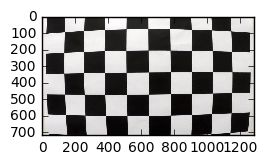

finding corners for image.. camera_cal/calibration10.jpg
can draw corners: True


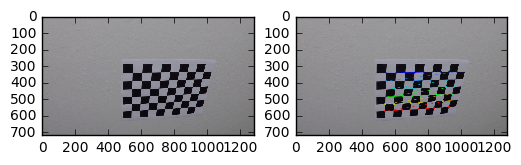

finding corners for image.. camera_cal/calibration11.jpg
can draw corners: True


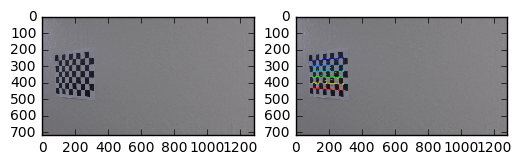

finding corners for image.. camera_cal/calibration12.jpg
can draw corners: True


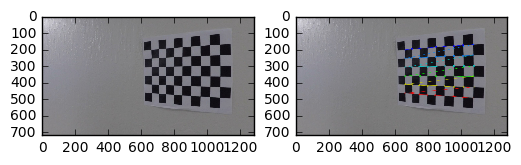

finding corners for image.. camera_cal/calibration13.jpg
can draw corners: True


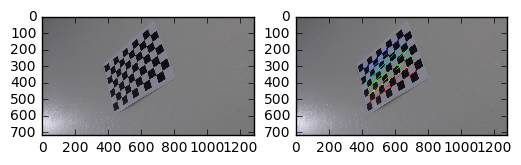

finding corners for image.. camera_cal/calibration14.jpg
can draw corners: True


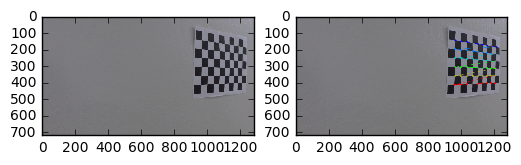

finding corners for image.. camera_cal/calibration15.jpg
can draw corners: True


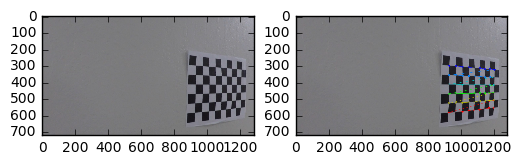

finding corners for image.. camera_cal/calibration16.jpg
can draw corners: True


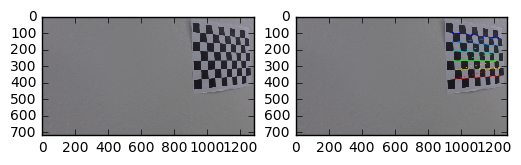

finding corners for image.. camera_cal/calibration17.jpg
can draw corners: True


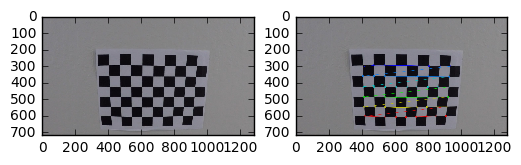

finding corners for image.. camera_cal/calibration18.jpg
can draw corners: True


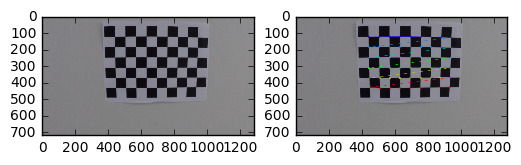

finding corners for image.. camera_cal/calibration19.jpg
can draw corners: True


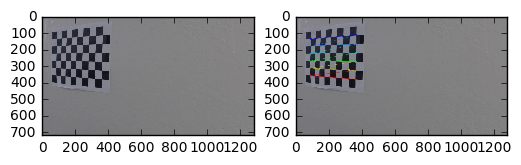

finding corners for image.. camera_cal/calibration2.jpg
can draw corners: True


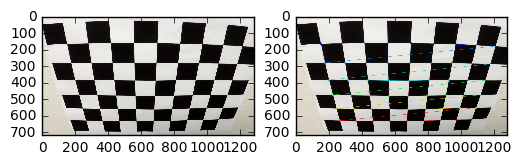

finding corners for image.. camera_cal/calibration20.jpg
can draw corners: True


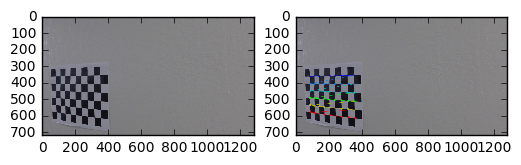

finding corners for image.. camera_cal/calibration3.jpg
can draw corners: True


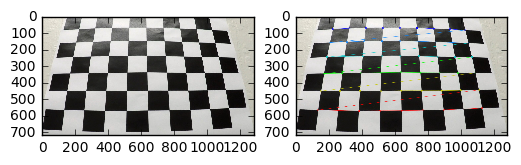

finding corners for image.. camera_cal/calibration4.jpg
can draw corners: False


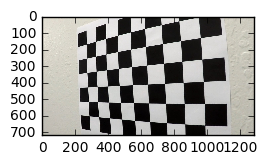

finding corners for image.. camera_cal/calibration5.jpg
can draw corners: False


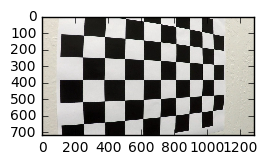

finding corners for image.. camera_cal/calibration6.jpg
can draw corners: True


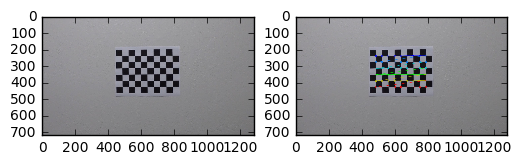

finding corners for image.. camera_cal/calibration7.jpg
can draw corners: True


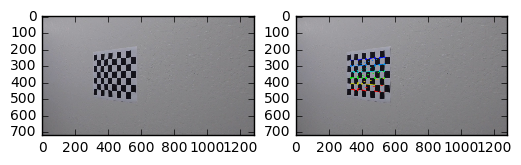

finding corners for image.. camera_cal/calibration8.jpg
can draw corners: True


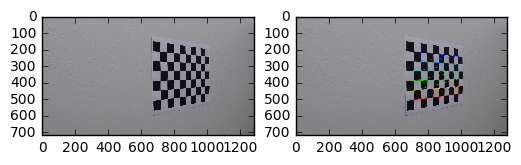

finding corners for image.. camera_cal/calibration9.jpg
can draw corners: True


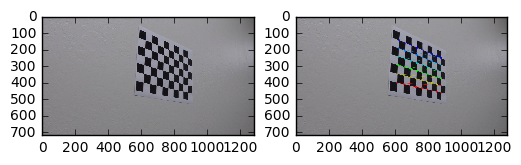

start calibration camera
show calibrated camera
undistorting image... camera_cal/calibration1.jpg


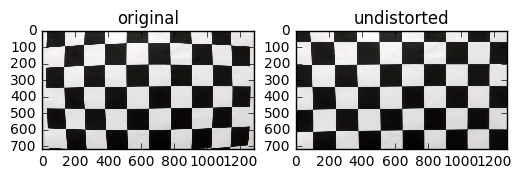

undistorting image... camera_cal/calibration10.jpg


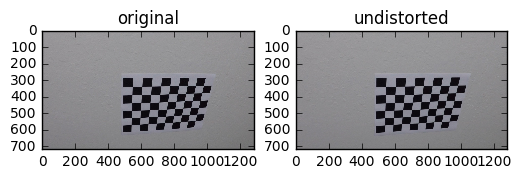

undistorting image... camera_cal/calibration11.jpg


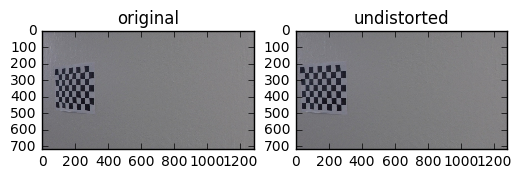

undistorting image... camera_cal/calibration12.jpg


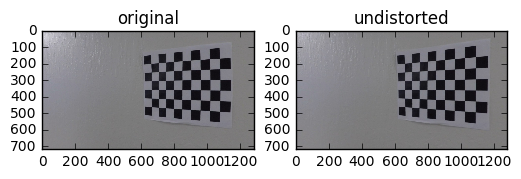

undistorting image... camera_cal/calibration13.jpg


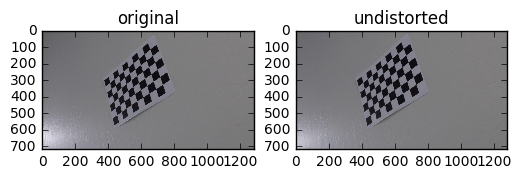

undistorting image... camera_cal/calibration14.jpg


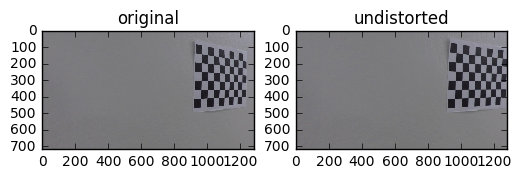

undistorting image... camera_cal/calibration15.jpg


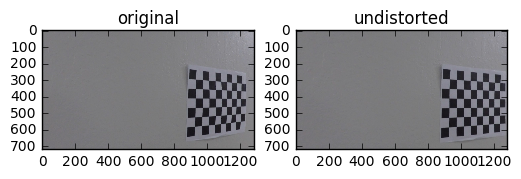

undistorting image... camera_cal/calibration16.jpg


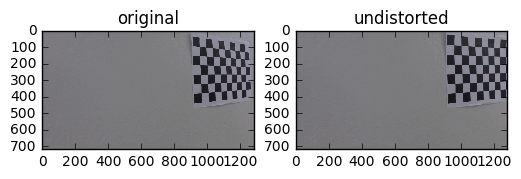

undistorting image... camera_cal/calibration17.jpg


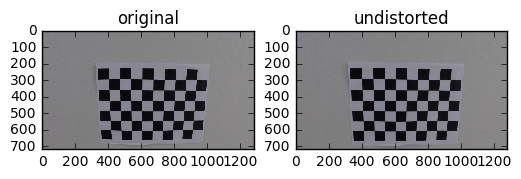

undistorting image... camera_cal/calibration18.jpg


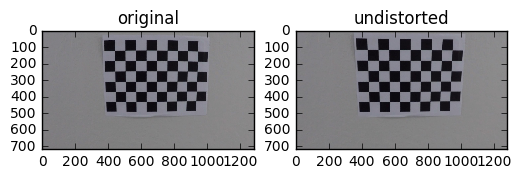

undistorting image... camera_cal/calibration19.jpg


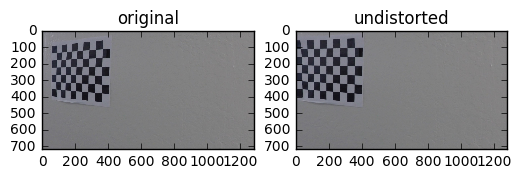

undistorting image... camera_cal/calibration2.jpg


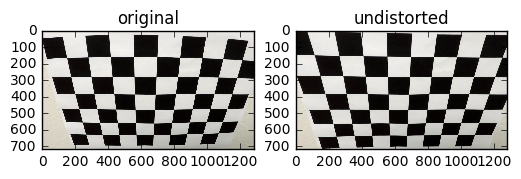

undistorting image... camera_cal/calibration20.jpg


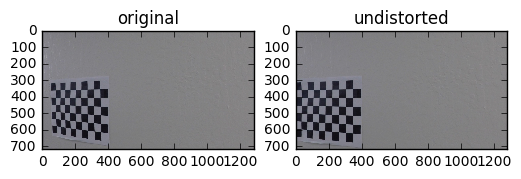

undistorting image... camera_cal/calibration3.jpg


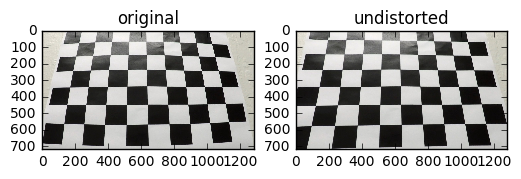

undistorting image... camera_cal/calibration4.jpg


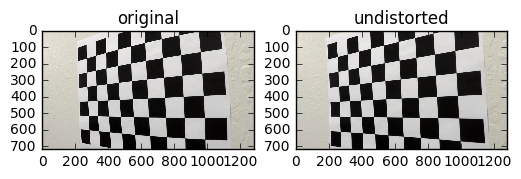

undistorting image... camera_cal/calibration5.jpg


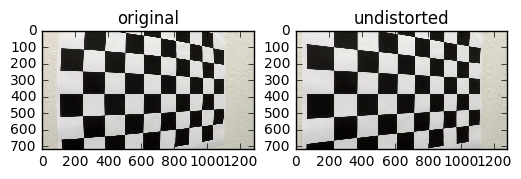

undistorting image... camera_cal/calibration6.jpg


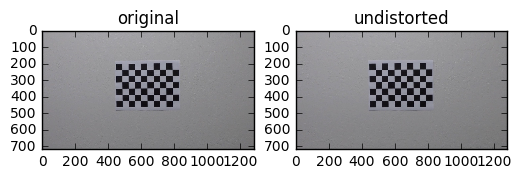

undistorting image... camera_cal/calibration7.jpg


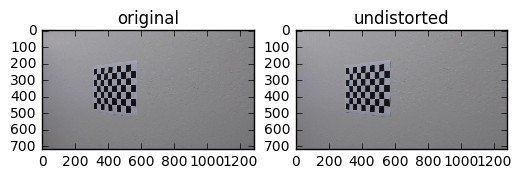

undistorting image... camera_cal/calibration8.jpg


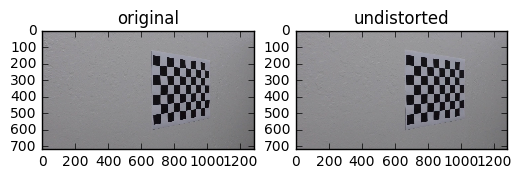

undistorting image... camera_cal/calibration9.jpg


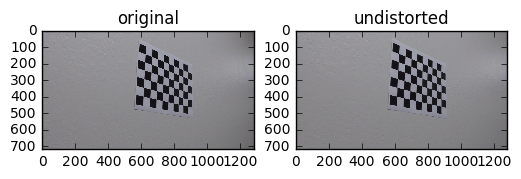

In [39]:
import glob

# read images
images = glob.glob('camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []
nx = 9
ny = 6

# prepare object points
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

for idx, fname in enumerate(images):
    plt.figure(idx+1)
    print("finding corners for image..", fname)
    # read image
    img = mpimg.imread(fname)
    
    # display original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # find corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    print("can draw corners:", ret)
    
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)

        # draw corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.subplot(1, 2, 2)
        plt.imshow(img)

    plt.show()

print("start calibration camera")
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
print("show calibrated camera")

for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    print("undistorting image...", fname)
    plt.figure(idx+1)
    plt.subplot(1,2,1)
    plt.title("original")
    plt.imshow(img)

    undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    plt.subplot(1,2,2)
    plt.title("undistorted")
    plt.imshow(undistorted)
    plt.show()
